# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

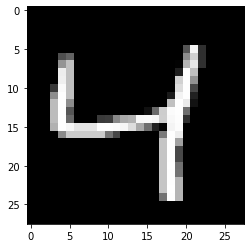

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [6]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,(None,mnist.train.images.shape[1]),"input")
targets_ = tf.placeholder(tf.float32,(None,mnist.train.images.shape[1]),"target")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_,encoding_dim,activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded,mnist.train.images.shape[1])
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits,"output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_,logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [7]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [8]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6905
Epoch: 1/20... Training loss: 0.6878
Epoch: 1/20... Training loss: 0.6843
Epoch: 1/20... Training loss: 0.6805
Epoch: 1/20... Training loss: 0.6752
Epoch: 1/20... Training loss: 0.6697
Epoch: 1/20... Training loss: 0.6625
Epoch: 1/20... Training loss: 0.6528
Epoch: 1/20... Training loss: 0.6441
Epoch: 1/20... Training loss: 0.6315
Epoch: 1/20... Training loss: 0.6201
Epoch: 1/20... Training loss: 0.6082
Epoch: 1/20... Training loss: 0.5901
Epoch: 1/20... Training loss: 0.5744
Epoch: 1/20... Training loss: 0.5576
Epoch: 1/20... Training loss: 0.5377
Epoch: 1/20... Training loss: 0.5202
Epoch: 1/20... Training loss: 0.5034
Epoch: 1/20... Training loss: 0.4855
Epoch: 1/20... Training loss: 0.4640
Epoch: 1/20... Training loss: 0.4482
Epoch: 1/20... Training loss: 0.4353
Epoch: 1/20... Training loss: 0.4141
Epoch: 1/20... Training loss: 0.4026
Epoch: 1/20... Training loss: 0.3900
Epoch: 1/20... Training loss: 0.3747
E

Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1805
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1882
E

Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1627
E

Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1305
E

Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1194
E

Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1100
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1108
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1113
Epoch: 4/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1198
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1117
E

Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1045
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1038
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1086
E

Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.0981
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1007
E

Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0928
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1030
E

Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0969
E

Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0978
E

Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0914
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.1015
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0923
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0914
E

Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0902
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.1003
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0903
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0981
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0894
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0988
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0991
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0894
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0980
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

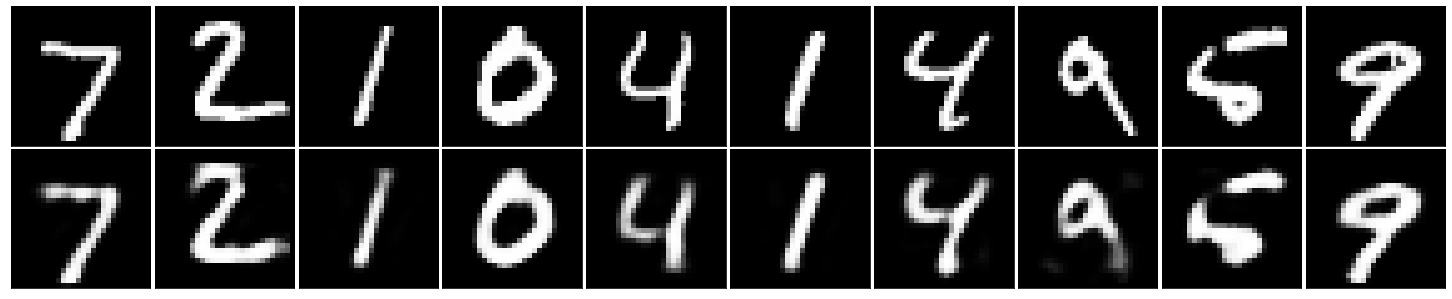

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [10]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.